## Data Exploration

In [34]:
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('c:/Users/migle/Desktop/BPR/IPWFormAi/data/all_data.csv', on_bad_lines='skip')
data

,Kunde,customname,customform,name,fieldobjectid,fieldparentid,fieldparenttype,elementtype,fieldtype,blocktype,specialtype,fieldrelation,fieldlabel,language
0,abinventech,form876,876,Kundereklamation,877,878.0,customformelement,field,listselect,NaN,NaN,form2488,Vælg kunde,DA
1,abinventech,form876,876,Kundereklamation,878,NaN,customform,block,NaN,layout_fieldset,NaN,NaN,Kundeoplysninger,DA
2,abinventech,form876,876,Kundereklamation,879,878.0,customformelement,field,string,NaN,NaN,NaN,Gadenavn,DA
3,abinventech,form876,876,Kundereklamation,880,878.0,customformelement,field,string,NaN,NaN,NaN,Postnr,DA
4,abinventech,form876,876,Kundereklamation,881,878.0,customformelement,field,string,NaN,NaN,NaN,By,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331,ipw,form1927875,1927875,Azure - Udløb af client secret,2610308,2592044.0,customformelement,special,NaN,NaN,createdby,NaN,Ansvarlig for opsætning,DA
10332,ipw,form1329139,1329139,Leverancer,2612534,NaN,customform,block,NaN,layout_fieldset,NaN,NaN,UDGÅET felter,DA
10333,ipw,form1329139,1329139,Leverancer,2612540,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet xxxx.ipw.dk,DA
10334,ipw,form1329139,1329139,Leverancer,2612546,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet <b>xxxx.ipw...,DA


**Missing values**

<Axes: >

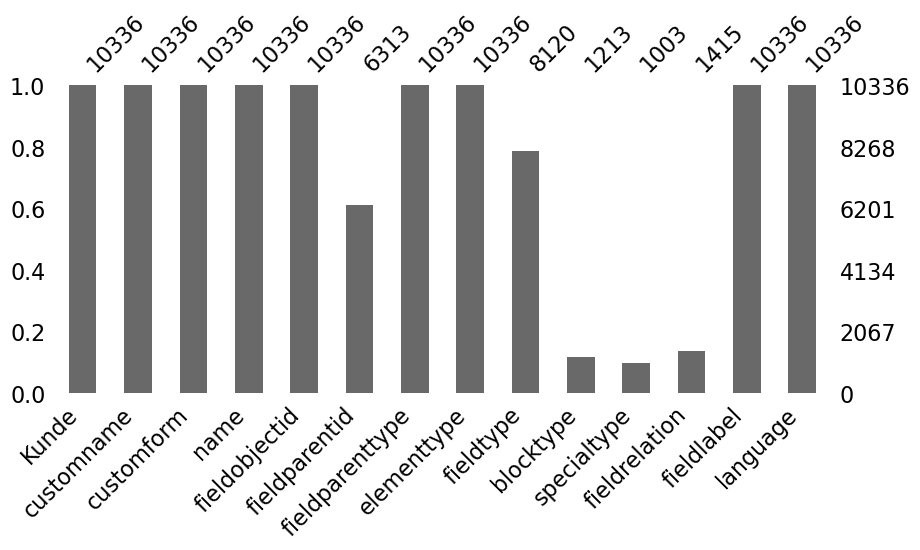

In [5]:
msno.bar(data,figsize=(10,4)) 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10336 entries, 0 to 10335
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kunde            10336 non-null  object 
 1   customname       10336 non-null  object 
 2   customform       10336 non-null  int64  
 3   name             10336 non-null  object 
 4   fieldobjectid    10336 non-null  int64  
 5   fieldparentid    6313 non-null   float64
 6   fieldparenttype  10336 non-null  object 
 7   elementtype      10336 non-null  object 
 8   fieldtype        8120 non-null   object 
 9   blocktype        1213 non-null   object 
 10  specialtype      1003 non-null   object 
 11  fieldrelation    1415 non-null   object 
 12  fieldlabel       10336 non-null  object 
 13  language         10336 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [88]:
#Dropping irrelevant columns such as customer name and columns with a lot of null values

data_drop_columns = ['Kunde', 'fieldobjectid', 'fieldparentid', 'blocktype', 'specialtype', 'fieldrelation']
data_new = data.drop(data_drop_columns, axis=1)
data_new

,customname,customform,name,fieldparenttype,elementtype,fieldtype,fieldlabel,language
0,form876,876,Kundereklamation,customformelement,field,listselect,Vælg kunde,DA
1,form876,876,Kundereklamation,customform,block,NaN,Kundeoplysninger,DA
2,form876,876,Kundereklamation,customformelement,field,string,Gadenavn,DA
3,form876,876,Kundereklamation,customformelement,field,string,Postnr,DA
4,form876,876,Kundereklamation,customformelement,field,string,By,DA
...,...,...,...,...,...,...,...,...
10331,form1927875,1927875,Azure - Udløb af client secret,customformelement,special,NaN,Ansvarlig for opsætning,DA
10332,form1329139,1329139,Leverancer,customform,block,NaN,UDGÅET felter,DA
10333,form1329139,1329139,Leverancer,customformelement,special,NaN,Installationen oprettes på domænet xxxx.ipw.dk,DA
10334,form1329139,1329139,Leverancer,customformelement,special,NaN,Installationen oprettes på domænet <b>xxxx.ipw...,DA


In [89]:
data_new.isnull().sum()

customname            0
customform            0
name                  0
fieldparenttype       0
elementtype           0
fieldtype          2216
fieldlabel            0
language              0
dtype: int64

In [90]:
df = data_new.dropna(subset=['fieldtype'])
df.isnull().sum()

customname         0
customform         0
name               0
fieldparenttype    0
elementtype        0
fieldtype          0
fieldlabel         0
language           0
dtype: int64

**Visualization of the data**

It could be interesting to look if there are any duplicates in form names or similar.

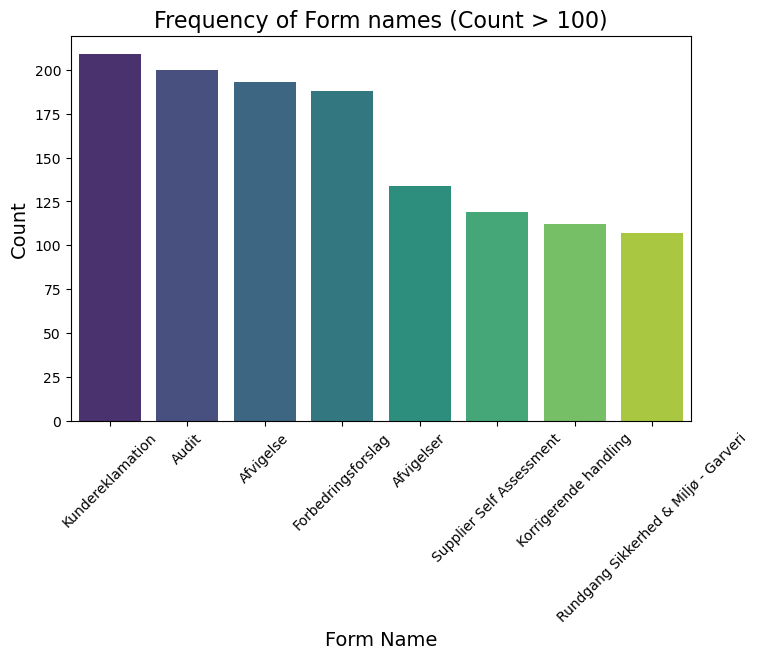

In [91]:
form_name_counts = df['name'].value_counts()
filtered_form_name = form_name_counts[form_name_counts>100]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=filtered_form_name.index, y=filtered_form_name.values, palette="viridis")
plt.title("Frequency of Form names (Count > 100)", fontsize=16)
plt.xlabel("Form Name", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [67]:
form_name_counted = df['name'].value_counts().reset_index()
form_name_counted.columns = ['Form name', 'Count']

# Print the table
print("Table of Form Name Frequencies:")
print(form_name_counted.to_string(index=False))

Table of Form Name Frequencies:
                                                                 Form name  Count
                                                          Kundereklamation    209
                                                                     Audit    200
                                                                 Afvigelse    193
                                                        Forbedringsforslag    188
                                                                Afvigelser    134
                                                  Supplier Self Assessment    119
                                                     Korrigerende handling    112
                                      Rundgang Sikkerhed & Miljø - Garveri    107
                                                      EHS - Arbejdsulykker     94
                                                                       APV     86
                                                               EHS

In [95]:
# Count occurrences of each form name
form_name_counted = df['name'].value_counts().reset_index()
form_name_counted.columns = ['Form name', 'Count']

# Get the top 10 form names and their counts
top_10_form_names = form_name_counted.head(10)

# Calculate the sum of the counts for the top 10
top_10_count_sum = top_10_form_names['Count'].sum()

# Print the result
print("Table of Top 10 Form Name Frequencies:")
print(top_10_form_names.to_string(index=False))
print(f"\nThe sum of counts for the top 10 form names is: {top_10_count_sum}")


Table of Top 10 Form Name Frequencies:
                           Form name  Count
                    Kundereklamation    209
                               Audit    200
                           Afvigelse    193
                  Forbedringsforslag    188
                          Afvigelser    134
            Supplier Self Assessment    119
               Korrigerende handling    112
Rundgang Sikkerhed & Miljø - Garveri    107
                EHS - Arbejdsulykker     94
                                 APV     86

The sum of counts for the top 10 form names is: 1442


In [94]:
unique_form_names = df['name'].nunique()
print("Number of unique form names: ", unique_form_names)

Number of unique form names:  837


This means that out of 10336 rows of forms, there are 837 unique form names. Which makes up 8% of the dataset. There are 10 form names that repeat in the dataset and in total sum up to 1442 times. 

Lets take a look at the language distribution for the dataset

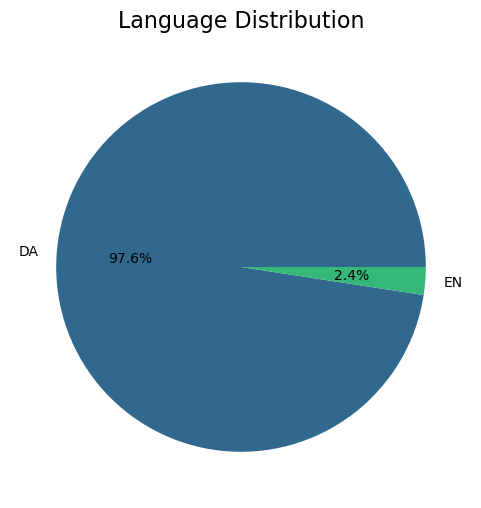

In [41]:
language_count = df['language'].value_counts()

# Optionally, a pie chart
plt.figure(figsize=(6, 6))
plt.pie(language_count.values, labels=language_count.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(language_count)))
plt.title("Language Distribution", fontsize=16)
plt.show()